In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from scipy import stats
import scipy.stats as sts
import seaborn as sns
import pandas as pd
from scipy.optimize import minimize

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

**a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x**

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [3]:
def cosine( a, b ):

    a_Length = np.linalg.norm(a)
    b_Length = np.linalg.norm(b)
    
    return np.dot( a, b ) / ( a_Length * b_Length )

In [4]:
for i in range(len(raitings)):
    diff = 0
    compared_user = raitings[i]

    for k, element in enumerate(raitings):
        if i != k:
            if cosine(element, compared_user) > diff:
                diff = cosine(element, compared_user)
                user_id = k

    print(f'Пользователь {i} похож на пользователя под номером {user_id} из нашей базы.')
    


Пользователь 0 похож на пользователя под номером 8 из нашей базы.
Пользователь 1 похож на пользователя под номером 4 из нашей базы.
Пользователь 2 похож на пользователя под номером 9 из нашей базы.
Пользователь 3 похож на пользователя под номером 9 из нашей базы.
Пользователь 4 похож на пользователя под номером 8 из нашей базы.
Пользователь 5 похож на пользователя под номером 9 из нашей базы.
Пользователь 6 похож на пользователя под номером 3 из нашей базы.
Пользователь 7 похож на пользователя под номером 5 из нашей базы.
Пользователь 8 похож на пользователя под номером 0 из нашей базы.
Пользователь 9 похож на пользователя под номером 2 из нашей базы.


**b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?**
Рандомный выбор 5 признаков из выборки, сравнение пользователей по пяти признакам и затем сравнение получившихся результатов с результатами по 15 признакам. В общей сложности нужно будет проанализировать 15!/(5!10!)=3003 комбинаций. Таким образом произойдет отсеивание тех признаков, что имеют наименьший вес среди 15.

## Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [5]:
from PIL import Image

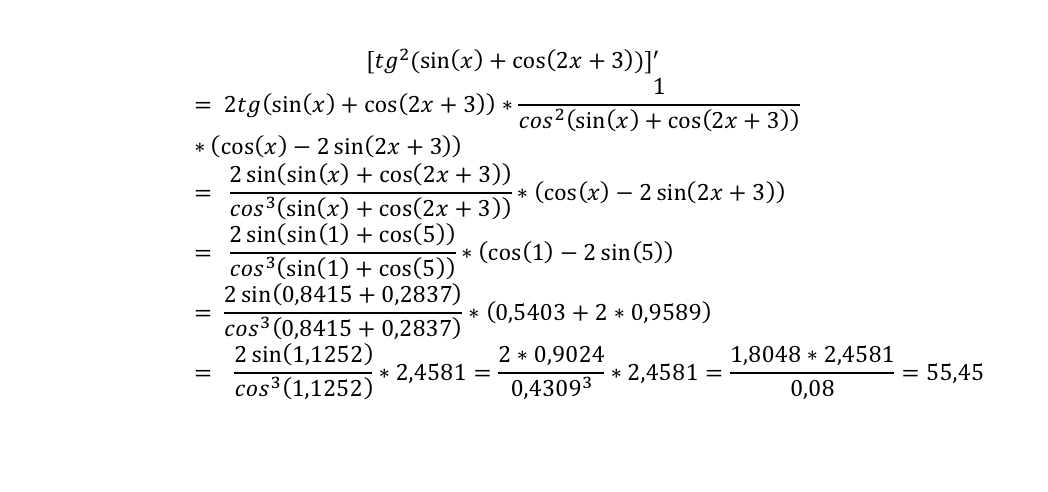

In [6]:
img = Image.open("derivative.png")
img

In [7]:
from scipy.misc import derivative
def f(x):
    return np.tan(np.sin(x)+np.cos(2*x+3))**2

print(derivative(f, 1.0, dx=1e-6))

55.3859176464222


## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [85]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [86]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [87]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

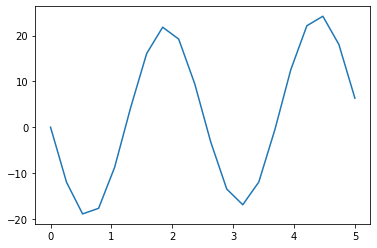

In [88]:
plt.plot(x, fx)
plt.show()


In [89]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [90]:
res  =  minimize(error,  (-1,0),  method='COBYLA')
print(res)

     fun: 0.07202963801507778
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 168
  status: 1
 success: True
       x: array([ 3.00000373, -2.49988951])


## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [31]:
rv = stats.binom(n=20,p=0.1)
sample = rv.rvs(size=1000)

[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

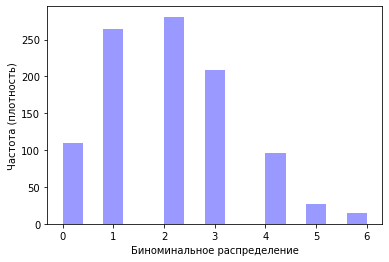

In [34]:
ax = sns.distplot(sample,
                  kde=False,
                  color='blue')
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

In [38]:
#параметры запуска: размеры выборок и количество повторов генерации
n1 = 50


samples_count = 1000
#массивы для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # на каждом цикле генерируем выборки разных размеров
    sample1 = rv.rvs(size=n1)

    # считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample1.mean())
   

Text(0.5, 0, '$x$')

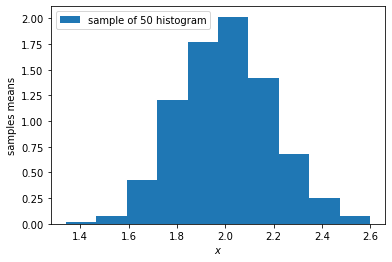

In [39]:
label_1 = 'sample of ' + str(n1) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

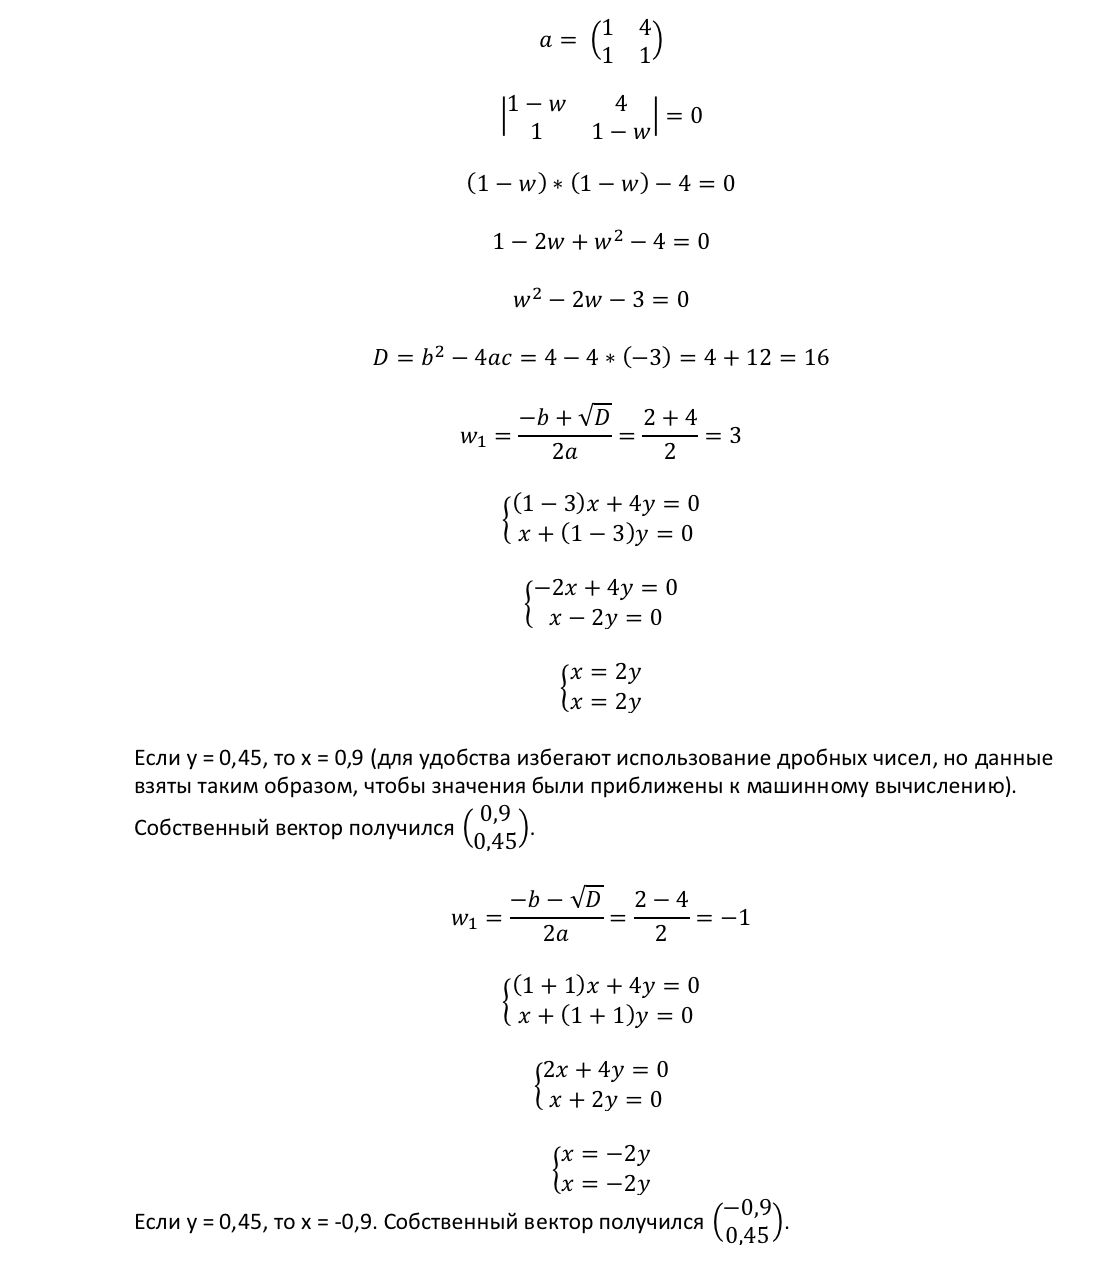

In [12]:
img = Image.open("Matrix.png")
img

In [8]:
a = np.array([[1, 4], [1, 1]]) 
print(a)

[[1 4]
 [1 1]]


In [10]:
w, v = np.linalg.eig(a)

In [11]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
